In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime

In [54]:
columns = ['Date', 'Tag', 'Post']
data = pd.read_csv('./data/MatPlotLib/QueryResults.csv', names=columns, header = None)
data.head()

,Date,Tag,Post
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0


In [55]:
data.shape

(1992, 3)

In [56]:
data.isnull().sum()

Date    0
Tag     0
Post    1
dtype: int64

In [57]:
clean_data = data.dropna()

In [58]:
grouped_data = clean_data.groupby('Tag').sum()
grouped_data.head()

,Date,Post
Tag,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852.0
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042.0
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530.0
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210.0
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212.0


In [59]:
clean_data.Date = pd.to_datetime(clean_data.Date)
clean_data.head()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_19769/534055225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.Date = pd.to_datetime(clean_data.Date)


,Date,Tag,Post
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,javascript,162.0
4,2008-08-01,c,85.0
5,2008-08-01,python,124.0


In [60]:
pivot_data = clean_data.pivot(index='Date', columns='Tag', values='Post')
pivot_data

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [61]:
pivot_data = pivot_data.fillna(0)
pivot_data

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


[]

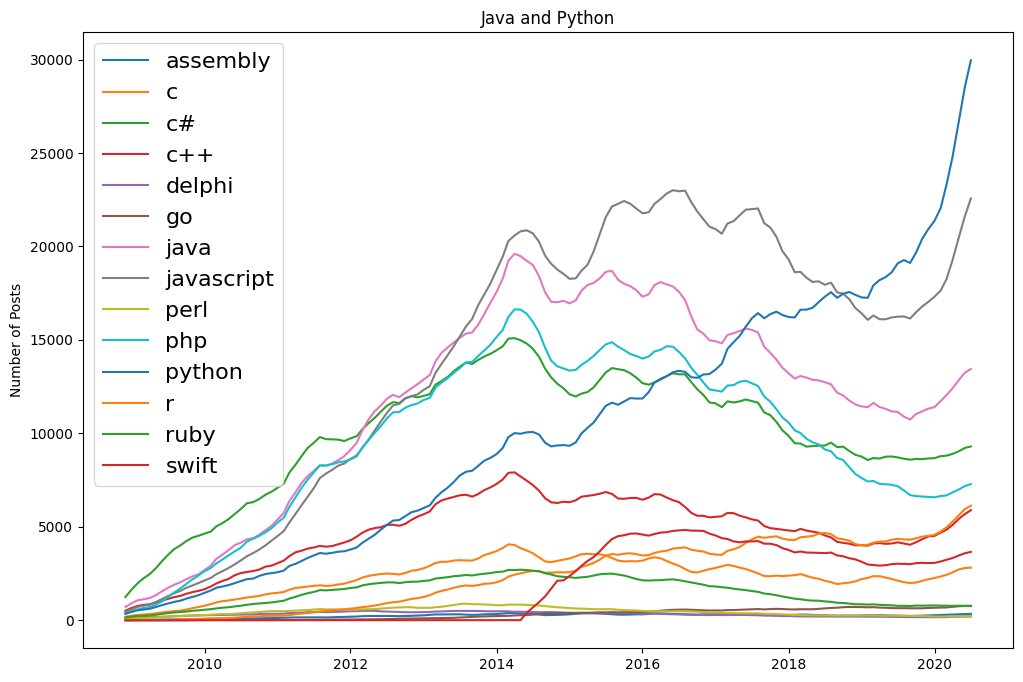

In [69]:
roll_data = pivot_data.rolling(window=6).mean()

plt.figure(figsize=(12,8))
plt.ylabel('Number of Posts')
plt.title('Java and Python')
for column in roll_data.columns:
    plt.plot(roll_data.index, roll_data[column], label = roll_data[column].name)
plt.legend(fontsize=16)
plt.plot()